## Problem 3: Google Playstore Apps Dataset (63 points)
> Given an Excel data file as represented by the sample file GooglePlaystore.xlsx (10K records), load it into a Pandas DataFrame (use the Pandas read_excel method), and perform the following tasks on it.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%pip install openpyxl
import openpyxl

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_excel('./GooglePlaystore.xlsx')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08 00:00:00,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06 00:00:00,1,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20 00:00:00,1,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19 00:00:00,Varies with device,Varies with device


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


---

### Preprocessing (28 pts)

---
1. [3 pts] Often there are outliers which do not match the overall data type. There is one record in this data where the "Reviews" has value "3.0M" which does not match the rest of the data. Remove that record.

In [4]:
# find the 3.0M in Reviews
outlier_row = df[df['Reviews'] == '3.0M']

# outlier_row
df = df.drop(outlier_row.index)

2. [4 pts] Remove rows where any of the columns has the value "Varies with device".


In [5]:
varies_with_device = df.isin(['Varies with device'])

rows_with_varies_with_device = varies_with_device.any(axis=1)

# print(rows_with_varies_with_device)

df = df[~rows_with_varies_with_device]

# Check if there are any rows left in df that contain 'Varies with device'
remaining_rows_with_varies_with_device = df.isin(['Varies with device']).any(axis=1)
print(remaining_rows_with_varies_with_device.sum())

0


3. [5 pts] The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words " and up"), so the result is a number. If there are multiple decimal places (eg. "x.y.z"), keep only the first two parts (eg "x.y"). For example, the value "4.1 and up" should be changed to "4.1". The value "4.5.6 and up" should be changed to "4.5". The value "5.6.7" should be changed to "5.6".
   
   If there is a range (eg. 5.0 - 8.0), only consider the first number. For example, the value "5.0 - 8.0" should be changed to "5.0". The value "4.0.3 - 7.1.1" should be changed to "4.0".

In [6]:
df['Android Ver'] = df['Android Ver'].str.extract(r'(\d+\.\d+)').astype(float)

df['Android Ver'].dtype

dtype('float64')

4. [5 pts] The "Installs" column must have integer values. For values that have commas, remove the commas. For values that have a '+' at the end, remove the '+'. Keep only those rows that have an integer value after these edits.

In [7]:
df['Installs'] = df['Installs'].str.replace('+', '', regex=False)
df['Installs'] = df['Installs'].str.replace(',', '', regex=False)

df['Installs'] = df['Installs'].astype(int)

df['Installs']

0          10000
1         500000
2        5000000
4         100000
5          50000
          ...   
10834        500
10835         10
10836       5000
10837        100
10838       1000
Name: Installs, Length: 9059, dtype: int64

In [8]:
df.describe()

,Rating,Installs,Android Ver
count,7643.000000,9.059000e+03,9057.000000
mean,4.172419,6.884536e+06,3.852876
std,0.546060,4.546183e+07,0.842420
min,1.000000,0.000000e+00,1.000000
25%,4.000000,1.000000e+03,4.000000
50%,4.300000,5.000000e+04,4.000000
75%,4.500000,1.000000e+06,4.100000
max,5.000000,1.000000e+09,8.000000


5. [5 pts] For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row.

In [9]:
missing_rating = df['Rating'].isna()

drop_indices = df[missing_rating & ((df['Reviews'] < 100) | (df['Installs'] < 50000))].index

df = df.drop(drop_indices)

df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(round(x.mean(), 2)))

6. [6 pts] Preprocess the Size column to convert the "M" (millions) and "K" (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [10]:
df['Size'] = df['Size'].replace({'M': '*1e6', 'k': '*1e3'}, regex=True).map(pd.eval).astype(int)

df['Size']

0        19000000
1        14000000
2         8700000
4         2800000
5         5600000
           ...   
10832      582000
10833      619000
10834     2600000
10836    53000000
10837     3600000
Name: Size, Length: 7661, dtype: int64

---

### Analysis (19 pts)
---

1. [4 pts] Describe (use DataFrame describe method) the category wise rating statistics. In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [11]:
for cat in df['Category'].unique():
    filtered_df = df[df['Category'] == cat]
    print(cat)
    print(filtered_df.describe()['Rating'])
#df['Category'].unique()
#df.describe()['Rating']

ART_AND_DESIGN
count    58.000000
mean      4.358621
std       0.368513
min       3.200000
25%       4.100000
50%       4.400000
75%       4.700000
max       5.000000
Name: Rating, dtype: float64
AUTO_AND_VEHICLES
count    62.000000
mean      4.146774
std       0.569935
min       2.100000
25%       3.900000
50%       4.250000
75%       4.500000
max       4.900000
Name: Rating, dtype: float64
BEAUTY
count    40.000000
mean      4.291750
std       0.356175
min       3.100000
25%       4.075000
50%       4.300000
75%       4.525000
max       4.900000
Name: Rating, dtype: float64
BOOKS_AND_REFERENCE
count    145.000000
mean       4.320138
std        0.456219
min        2.700000
25%        4.100000
50%        4.400000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64
BUSINESS
count    245.000000
mean       4.119184
std        0.663942
min        1.000000
25%        3.800000
50%        4.300000
75%        4.500000
max        5.000000
Name: Rating, dtype: float64
COMICS
cou

2. [11 pts] Extract all "Free" apps from the master data frame. Then write a function that, given a numeric column e.g 'Rating'), will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:
   
    a. Rating (gives top 3 most highly rated applications in each category)  
    b. Installs (gives top 3 most installed applications in each category)  
    c. Reviews (gives top 3 most reviewed applications in each category)  

    **You don't need to do anything explicit to break ties.**

    Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for a.), Installs (for b.), and Reviews (for c.) as the third column, as for instance:

In [12]:
filtered_df = df[df['Type'] == 'Free']
rating = filtered_df.sort_values(by=['Rating'], ascending=False)
rating_df = rating[['Category', 'App', 'Rating']][:3]
print(rating_df)
install = filtered_df.sort_values(by=['Installs'], ascending=False)
install_df = install[['Category', 'App', 'Installs']][:3]
print(install_df)
review = filtered_df.sort_values(by=['Reviews'], ascending=False)
review_df = review[['Category', 'App', 'Reviews']][:3]
print(review_df)

        Category                               App  Rating
10837     FAMILY  Fr. Mike Schmitz Audio Teachings     5.0
6604   LIFESTYLE                       BP Log lite     5.0
6494       TOOLS                     BM speed test     5.0
                Category             App    Installs
1872                GAME  Subway Surfers  1000000000
1654                GAME  Subway Surfers  1000000000
3736  NEWS_AND_MAGAZINES     Google News  1000000000
     Category             App   Reviews
1879     GAME  Clash of Clans  44893888
1704     GAME  Clash of Clans  44891723
1670     GAME  Clash of Clans  44891723


3. [4 pts] Find the average, maximum and minimum price of the paid applications.

In [13]:
filtered_df = df[df['Type'] == 'Paid']
print(filtered_df['Price'].mean())
print(filtered_df['Price'].max())
print(filtered_df['Price'].min())

15.150767888307014
400
0.99


---

### Visualization (16 pts)
---

[9 pts] In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, Creativity’].
Count the number of applications per genre and display it using a pie chart.
Hint: Read about DataFrame.explode()


In [14]:
df['Genres']

0                     Art & Design
1        Art & Design;Pretend Play
2                     Art & Design
4          Art & Design;Creativity
5                     Art & Design
                   ...            
10832                      Weather
10833            Books & Reference
10834                    Education
10836                    Education
10837                    Education
Name: Genres, Length: 7661, dtype: object

<Axes: ylabel='Genres'>

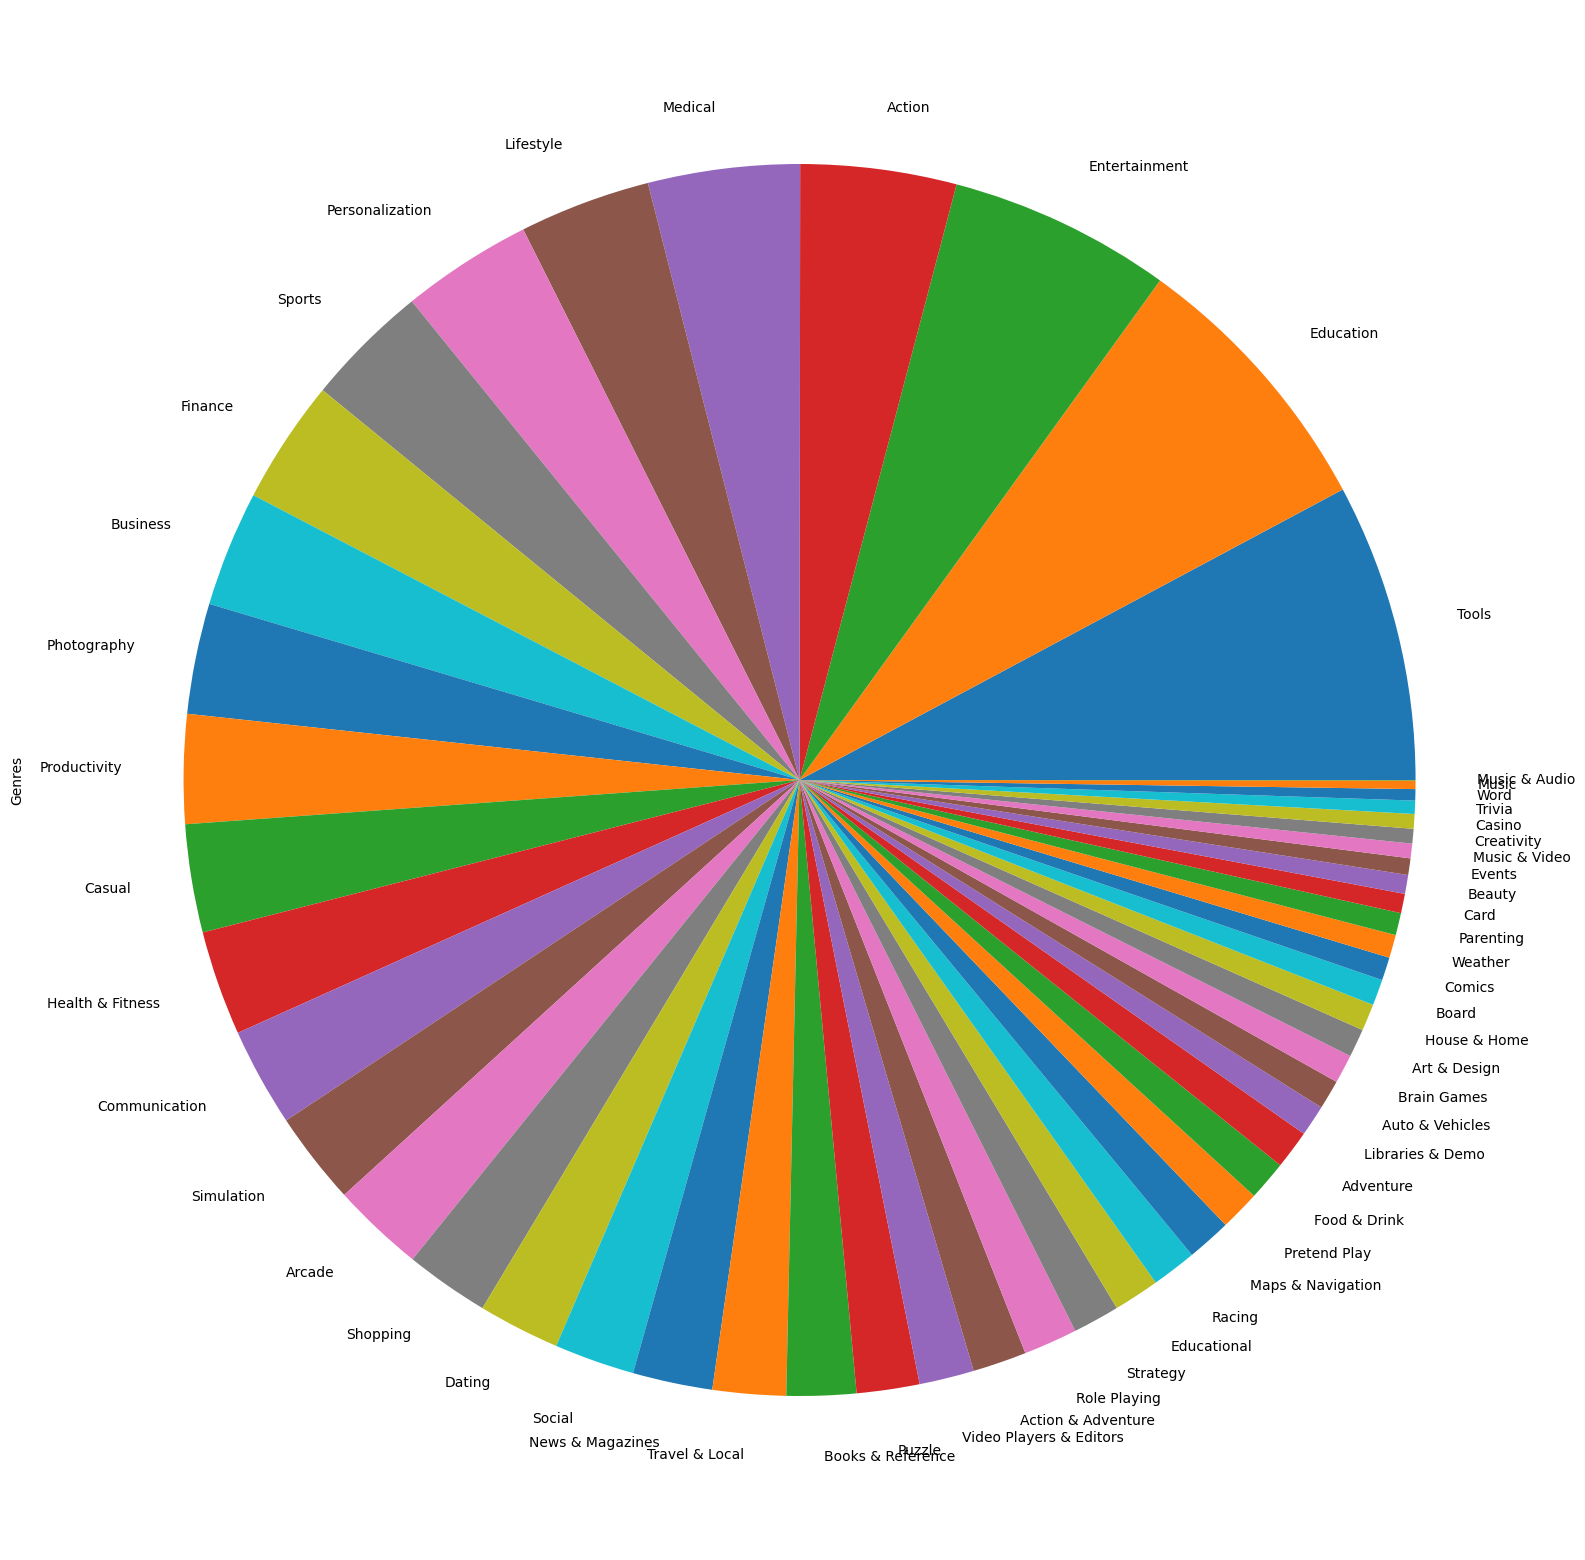

In [15]:
df['Genres'] = df['Genres'].str.split(';')

df_genres = df.explode('Genres')

genre_counts = df_genres['Genres'].value_counts()

genre_counts.plot(kind='pie', figsize=(20, 20))

[7 pts] Display a box plot of ratings for "Business" and "Education" categories. The boxplots should be in the same plot.

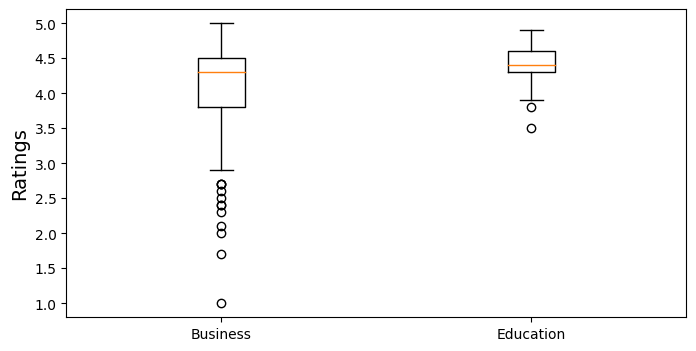

In [16]:
business = df[df['Category'] == 'BUSINESS']
education = df[df['Category'] == 'EDUCATION']
plt.figure(figsize=(8, 4))
plt.boxplot([business['Rating'], education['Rating']],labels=('Business','Education'))
plt.ylabel('Ratings', fontsize=14)
plt.show()